<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Overview</a></span></li></ul></li><li><span><a href="#Utility-Functions" data-toc-modified-id="Utility-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Utility Functions</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Summarize" data-toc-modified-id="Summarize-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Summarize</a></span></li><li><span><a href="#Simple-Models" data-toc-modified-id="Simple-Models-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Simple Models</a></span></li></ul></li><li><span><a href="#Soft-PLS-DA-(Discrimination)-Model" data-toc-modified-id="Soft-PLS-DA-(Discrimination)-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Soft PLS-DA (Discrimination) Model</a></span><ul class="toc-item"><li><span><a href="#Optimize-model" data-toc-modified-id="Optimize-model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Optimize model</a></span></li><li><span><a href="#SHAP-Explanations" data-toc-modified-id="SHAP-Explanations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>SHAP Explanations</a></span><ul class="toc-item"><li><span><a href="#Look-at-the-GAU-error-in-the-Training-Set" data-toc-modified-id="Look-at-the-GAU-error-in-the-Training-Set-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Look at the GAU error in the Training Set</a></span></li><li><span><a href="#Look-at-the-GAU-errors-in-the-Test-Set" data-toc-modified-id="Look-at-the-GAU-errors-in-the-Test-Set-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Look at the GAU errors in the Test Set</a></span></li></ul></li><li><span><a href="#Diagnostics" data-toc-modified-id="Diagnostics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Diagnostics</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#DD-SIMCA-Authentication-Models" data-toc-modified-id="DD-SIMCA-Authentication-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DD-SIMCA Authentication Models</a></span><ul class="toc-item"><li><span><a href="#Optimize-models" data-toc-modified-id="Optimize-models-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Optimize models</a></span></li><li><span><a href="#SHAP-Explanations" data-toc-modified-id="SHAP-Explanations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>SHAP Explanations</a></span><ul class="toc-item"><li><span><a href="#Look-at-the-GAU-errors-on-the-Test-Set" data-toc-modified-id="Look-at-the-GAU-errors-on-the-Test-Set-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Look at the GAU errors on the Test Set</a></span></li></ul></li><li><span><a href="#Diagnostics" data-toc-modified-id="Diagnostics-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Diagnostics</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#EllipticManifold-Authentication-Models" data-toc-modified-id="EllipticManifold-Authentication-Models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EllipticManifold Authentication Models</a></span><ul class="toc-item"><li><span><a href="#Optimize-model" data-toc-modified-id="Optimize-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Optimize model</a></span></li><li><span><a href="#SHAP-Explanations" data-toc-modified-id="SHAP-Explanations-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SHAP Explanations</a></span></li><li><span><a href="#Diagnostics" data-toc-modified-id="Diagnostics-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Diagnostics</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

In [1]:
using_colab = 'google.colab' in str(get_ipython())
if using_colab:
    !git clone https://github.com/mahynski/chemometrics.git
    !cd chemometrics; pip install -r requirements.txt
else:
    import sys
    sys.path.append('../../../')

import chemometrics

import matplotlib.pyplot as plt
%matplotlib notebook

import watermark
%load_ext watermark

%load_ext autoreload
%autoreload 2

In [115]:
import sklearn
import imblearn
import shap
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

shap.initjs()

Overview
--------
This notebook analyzes stable stable isotope and trace element (SITE) data collected from beef samples to assess their provenance.

In [18]:
%watermark -t -m -v --iversions

watermark 2.0.2
sklearn   0.22.2.post1
pandas    0.25.1
json      2.0.9
imblearn  0.5.0
numpy     1.21.4
seaborn   0.11.2
10:36:43 

CPython 3.7.4
IPython 7.8.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-167-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


# Utility Functions

In [355]:
def plot_learning_curve(model, X, y, cv=3, train_sizes=[0.2, 0.4, 0.6, 0.8, 1.0]):
    from sklearn.model_selection import learning_curve

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=train_sizes,
        cv=sklearn.model_selection.StratifiedKFold(
            n_splits=cv, 
            shuffle=True, 
            random_state=0
        ),
        n_jobs=1,
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.plot(
        train_sizes,
        train_mean,
        color="blue",
        marker="o",
        markersize=5,
        label="Training",
    )

    plt.fill_between(
        train_sizes,
        train_mean + train_std,
        train_mean - train_std,
        alpha=0.15,
        color="blue",
    )

    plt.plot(
        train_sizes,
        test_mean,
        color="green",
        linestyle="--",
        marker="s",
        markersize=5,
        label="Validation",
    )

    plt.fill_between(
        train_sizes,
        test_mean + test_std,
        test_mean - test_std,
        alpha=0.15,
        color="green",
    )

    plt.grid()
    plt.xlabel("Number of training samples")
    plt.ylabel("TEFF")
    plt.legend(loc="best")
    plt.tight_layout()

# Exploratory Data Analysis

## Load Data

In [19]:
# This data comes from the IAEA and is hosted by NIST

In [5]:
# # 1. Query Website
# df = pd.read_csv('https://www.nist.gov/path/to/database/beef.csv')
#        .drop(['ID','NR','RegionNo','LabNo','Date'], axis=1)
#        .groupby(['TraceSampleCode', 'Region'])
#        .reset_index('Region')

# # 2. Some basic preprocessing (Only use data with all available measurements)
# data = df.dropna() 

# # 3. Extract X and y matrices
# X = data[[x for x in data.columns if x != 'Region']].values
# y = data['Region'].values

# Dropping IRE because not enough data to sustain CV
# Note that SIC also is likely to have problems

# mask = np.array([a != 'IRE' for a in y])
# X = X[mask]
# y = y[mask]

# # 4. Initial train/test split
# X_train, X_test, y_train, y_test = sklearn
#                                     .model_selection
#                                     .train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [6]:
from pathlib import Path

def get_parsed_data(path, drop_cols):
    df = pd.read_csv(path)
    drop = [x for x in df.columns if x in drop_cols]
    return (
        df
        .drop(drop, axis=1)
        .groupby(['TraceSampleCode', 'Region'])
        .mean()
    )

df = pd.concat((
    get_parsed_data(path, drop_cols=['ID','NR','RegionNo','LabNo','Date'])
    for path in Path('./data/').glob('tbl_Beef*.csv') if 'Field' not in path.name), 
    axis=1,
    sort=True, 
    copy=True, 
    verify_integrity='True',
    join='outer').reset_index('Region')

data = df.dropna() # Only use data with all available measurements

analytes = [x for x in data.columns if x != 'Region']
X = data[analytes].values
y = data['Region'].values

# Dropping IRE because not enough data to sustain CV
# Note that SIC also is likely to have problems

mask = np.array([a != 'IRE' for a in y])
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Summarize

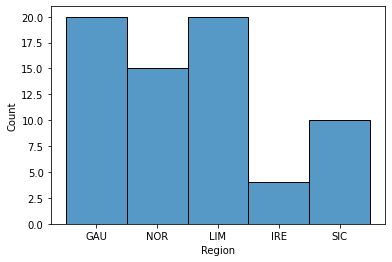

In [7]:
sns.histplot(data, x='Region') # IRE was discarded above because not enough samples to sustain CV

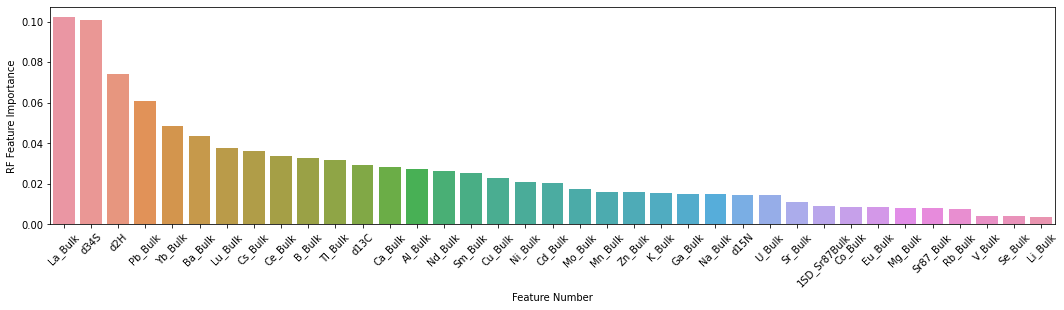

In [8]:
def random_forest_importances(X, y, columns, test_size=0.2, n_estimators=100, ax=None):
    """
    Preliminary estimate of feature importance based on random forests.
    
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=feature%20importance#sklearn.ensemble.RandomForestClassifier.feature_importances_
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=y)

    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    forest.fit(X_train, y_train) # Tree-based classifiers do not need scaling/normalization

    importances = sorted(list(zip(columns, forest.feature_importances_)), key=lambda x:x[1], reverse=True)

    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(18,4))
        importance_df = pd.DataFrame(
            columns=['Element', 'Importance'],
            data=importances,
        )
        plt.xticks(rotation=45)
        _ = sns.barplot(data=importance_df, x='Element', y='Importance', ax=ax, orient='v')

    ax.set_xlabel('Feature Number')
    ax.set_ylabel('RF Feature Importance')

    return importances

analytes = [x for x in data.columns if x != 'Region']
importances = random_forest_importances(
    data[analytes].values,
    data['Region'].values, 
    columns=analytes,
    test_size=0.2, 
    n_estimators=100
)

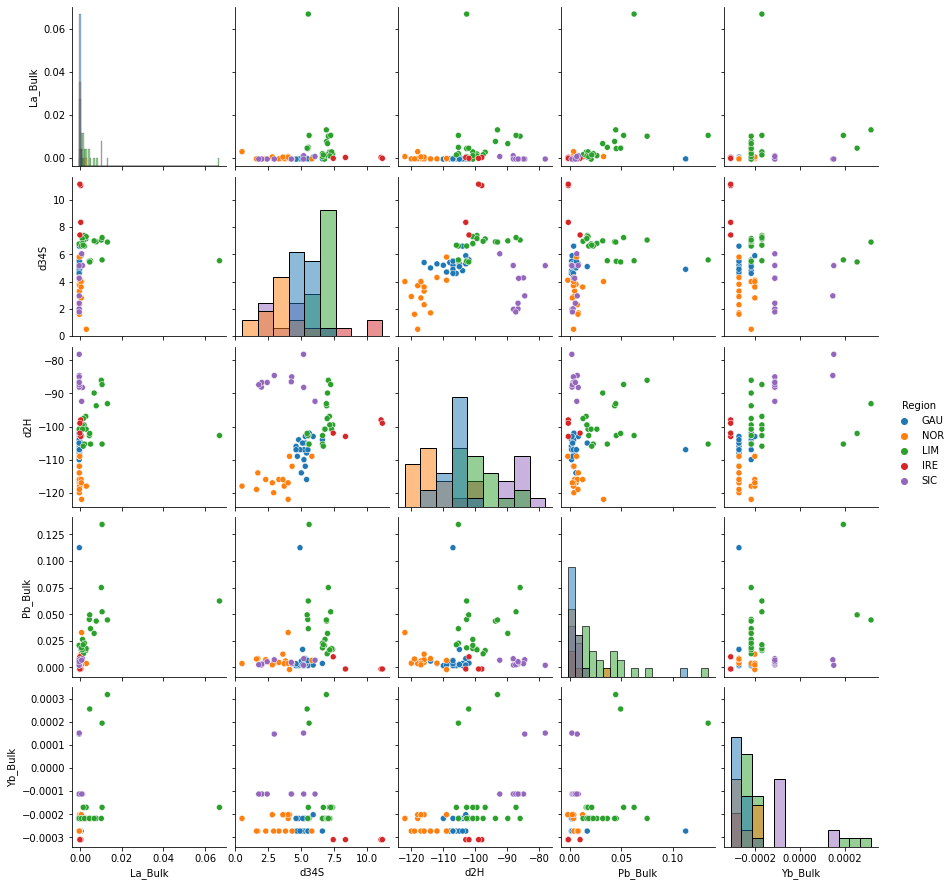

In [9]:
# Pairwise, these features show some separation/clustering suggesting that classification is likely to 
# be successful.
sns.pairplot(data, 
             vars=[x_[0] for x_ in importances[:5]],
             diag_kind='hist', 
             hue='Region')

## Simple Models

Text(0.5, 1.0, 'LDA')

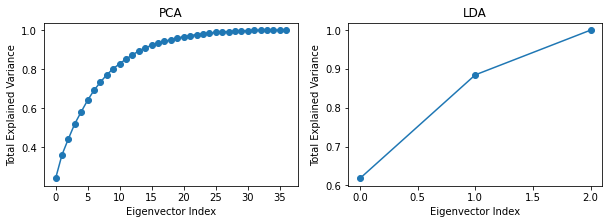

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA as PCA
from sklearn.preprocessing import StandardScaler

lda = LDA(solver='svd', shrinkage=None, n_components=3)
pca = PCA(whiten=False, random_state=0)

ss = StandardScaler()
X_scaled = ss.fit_transform(X_train)

lda.fit(X_scaled, y_train)
pca.fit(X_scaled, y_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
ax = axes.flatten()

ax[0].plot(np.cumsum(pca.explained_variance_ratio_), '-o')
ax[0].set_ylabel('Total Explained Variance')
ax[0].set_xlabel('Eigenvector Index')
ax[0].set_title('PCA')

ax[1].plot(np.cumsum(lda.explained_variance_ratio_), '-o')
ax[1].set_ylabel('Total Explained Variance')
ax[1].set_xlabel('Eigenvector Index')
ax[1].set_title('LDA')

In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


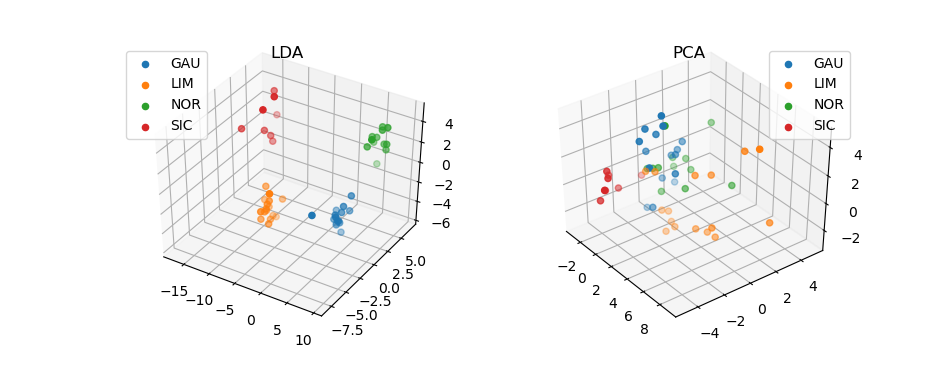

In [15]:
# LDA (supervised) separates well in a few dimensions, PCA (unsupervised) does not

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

X_new_lda = lda.transform(X_scaled)
X_new_pca = pca.transform(X_scaled)

ax = fig.add_subplot(121, projection='3d')
ax.set_title('LDA')
for loc in np.unique(y_train):
    x_ = X_new_lda[y_train == loc,:]
    ax.scatter(x_[:,0], x_[:,1], x_[:,2], label=loc)
plt.legend(loc='best')

ax = fig.add_subplot(122, projection='3d')
ax.set_title('PCA')
for loc in np.unique(y_train):
    x_ = X_new_pca[y_train == loc,:]
    ax.scatter(x_[:,0], x_[:,1], x_[:,2], label=loc)
plt.legend(loc='best')

In [ ]:
# LDA looks good, but the goal is to build an authentication model not a discrimination model

# Soft PLS-DA (Discrimination) Model

In [24]:
from chemometrics.classifier.plsda import PLSDA

## Optimize model

In [26]:
# Let's optimize a PLS-DA model based on its total efficiency (TEFF). Data scaling is handled
# internally via the scale_x hyperparameter so we don't need additional step initially, unless
# you want to add this for some reason.

pipeline = imblearn.pipeline.Pipeline(steps=[
    # Insert other preprocessing steps here...
    # ("smote", ScaledSMOTEENN(random_state=1)), # For example, class balancing
    ("plsda", PLSDA(n_components=3, 
                    alpha=0.05,
                    gamma=0.01,
                    scale_x=True, 
                    not_assigned='UNKNOWN',
                    style='soft', 
                    score_metric='TEFF'
                   )
    )
])

# Hyperparameters of pipeline steps are given in standard notation: step__parameter_name
param_grid = [{
    # 'smote__k_enn':[1, 2, 3],
    # 'smote__k_smote':[1, 3, 3],
    # 'smote__kind_sel_enn':['all', 'mode'],
    'plsda__n_components':np.arange(1, 20, 2),
    'plsda__alpha': [0.05, 0.01], # Try a few alpha values to see
    'plsda__scale_x': [True], # SITE data makes sense to standardize
}]

gs = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    cv=sklearn.model_selection.StratifiedKFold(
        n_splits=3, 
        shuffle=True, 
        random_state=0
    ),
    error_score=0,
    refit=True
)

_ = gs.fit(X_train, y_train)

In [27]:
gs.best_params_

{'plsda__alpha': 0.05, 'plsda__n_components': 3, 'plsda__scale_x': True}

In [37]:
pred = gs.predict(X_test)
df, I, CSNS, CSPS, CEFF, TSNS, TSPS, TEFF = gs.best_estimator_.named_steps['plsda'].figures_of_merit(pred, y_test)

In [38]:
df # Look at the predictions (akin to confusion matrix)

,GAU,LIM,NOR,SIC,UNKNOWN
GAU,3,1,0,0,1
LIM,0,4,0,0,0
NOR,0,0,3,0,0
SIC,0,0,0,2,0


In [46]:
# Were their any outliers detected at the given gamma=0.01? 
np.any(gs.best_estimator_.named_steps['plsda'].check_outliers())
# No! So no need to iteratively "clean" the dataset as in, e.g., Rodionova OY., Pomerantsev AL. 
# "Detection of Outliers in Projection-Based Modeling", Anal. Chem. 2020, 92, 2656−2664.

False

In [35]:
print('Best PLSDA model has TEFF (train) = {}, TEFF (test) = {}'.format(
    '%.4f'%gs.score(X_train, y_train),
    '%.4f'%gs.score(X_test, y_test))
)

Best PLSDA model has TEFF (train) = 0.9711, TEFF (test) = 0.9231


In [ ]:
# Just like LDA, the discriminant model is very good - this is a "soft" PLS-DA so closer to authentication
# model, but not exactly.

<IPython.core.display.Javascript object>


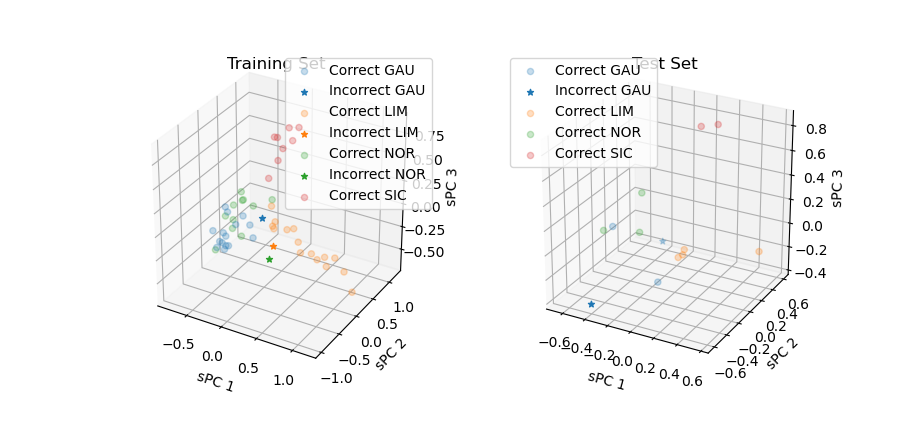

In [172]:
# Let's visualize the results
fig = plt.figure()
for i, (x_, y_, title) in enumerate(zip( (X_train, X_test), (y_train, y_test), ('Training Set', 'Test Set') )):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    for j, class_ in enumerate(np.unique(y_)):
        mask = y_ == class_
        
        correct = np.array([a==b for a,b in zip([[a] for a in y_[mask].tolist()], gs.predict(x_[mask]))])
        
        X_proj = gs.transform(x_[mask])
        if np.sum(correct > 0):
            ax.scatter(X_proj[correct,0], X_proj[correct,1], X_proj[correct,2], 
                       label='Correct '+class_, color='C{}'.format(j), marker='o', alpha=0.25)
        if np.sum(~correct > 0):
            ax.scatter(X_proj[~correct,0], X_proj[~correct,1], X_proj[~correct,2], 
                       label='Incorrect '+class_, color='C{}'.format(j), marker='*')

    ax.set_xlabel('sPC 1')
    ax.set_ylabel('sPC 2')
    ax.set_zlabel('sPC 3')
    ax.legend(loc='best')
    ax.set_title(title)

## SHAP Explanations

In [90]:
explainer = shap.KernelExplainer(
    model = gs.predict_proba, 
    data = shap.sample(X_train, 10, random_state=0), # vs. data = X_train to use full training set
)

In [ ]:
explainer.expected_value

In [ ]:
gs.best_estimator_.named_steps['plsda'].categories

In [92]:
shap_values_train = explainer.shap_values(X_train, 
                                    nsamples='auto', # Can increase for lower variance
                                    l1_reg='num_features({})'.format(
                                        np.min(
                                            [X_train.shape[1], 20] # Only look at (up to) the top 20 features
                                        )
                                    )
                                   )

In [169]:
shap_values_test = explainer.shap_values(X_test, 
                                    nsamples='auto', # Can increase for lower variance
                                    l1_reg='num_features({})'.format(
                                        np.min(
                                            [X_test.shape[1], 20] # Only look at (up to) the top 20 features
                                        )
                                    )
                                   )

<IPython.core.display.Javascript object>


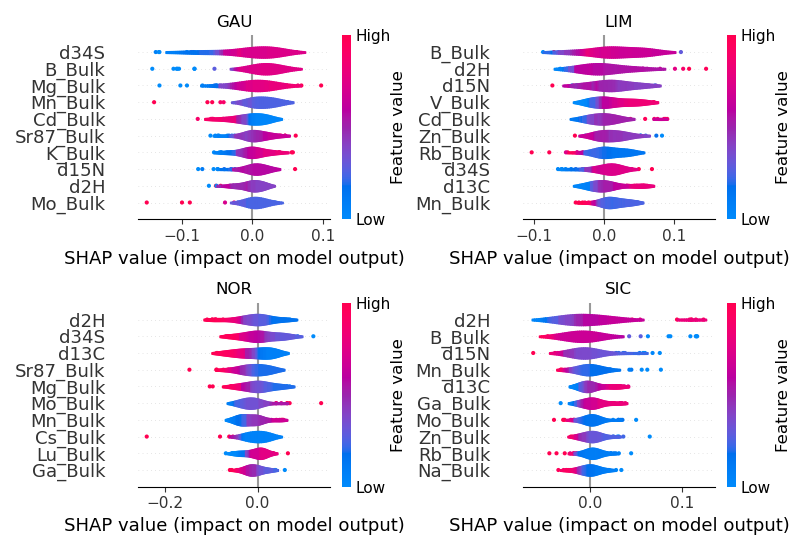

In [113]:
fig = plt.figure(figsize=(10,6))

for chosen_class in [0, 1, 2, 3]:
    ax = fig.add_subplot(2, 2, chosen_class+1)
    ax.set_title(gs.best_estimator_.named_steps['plsda'].categories[chosen_class])
    sv = shap_values_train[chosen_class]

    shap.summary_plot(
        shap_values=sv,
        features=X_train,
        feature_names=analytes,
        plot_type='violin',
        max_display=10
    )
plt.tight_layout()

<IPython.core.display.Javascript object>


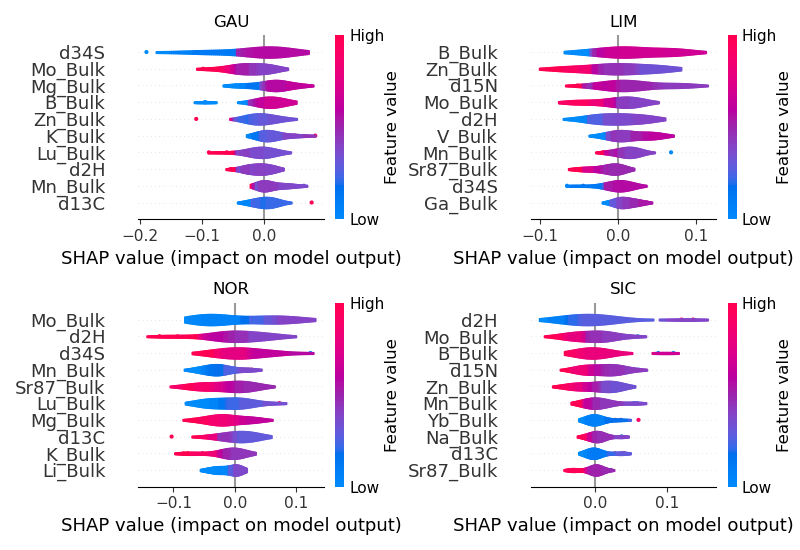

In [171]:
fig = plt.figure(figsize=(10,6))

for chosen_class in [0, 1, 2, 3]:
    ax = fig.add_subplot(2, 2, chosen_class+1)
    ax.set_title(gs.best_estimator_.named_steps['plsda'].categories[chosen_class])
    sv = shap_values_test[chosen_class]

    shap.summary_plot(
        shap_values=sv,
        features=X_test,
        feature_names=analytes,
        plot_type='violin',
        max_display=10
    )
plt.tight_layout()

### Look at the GAU error in the Training Set

In [181]:
chosen_class = 0 # GAU = class 0

In [182]:
# The reason it was incorrectly predicted was because it was determined to be BOTH GAU and LIM
# Since predict() orders by lowest Mahalanobis distance, this suggests LIM is more likely, but
# GAU was still predicted.

y_ = y_train
mask = y_ == gs.best_estimator_.named_steps['plsda'].categories[chosen_class]
x_ = X_train
incorrect = ~np.array([a==b for a,b in zip([[a] for a in y_[mask].tolist()], gs.predict(x_[mask]))])

np.array(gs.predict(X_train), dtype=object)[mask][incorrect]

array([list(['LIM', 'GAU'])], dtype=object)

<IPython.core.display.Javascript object>


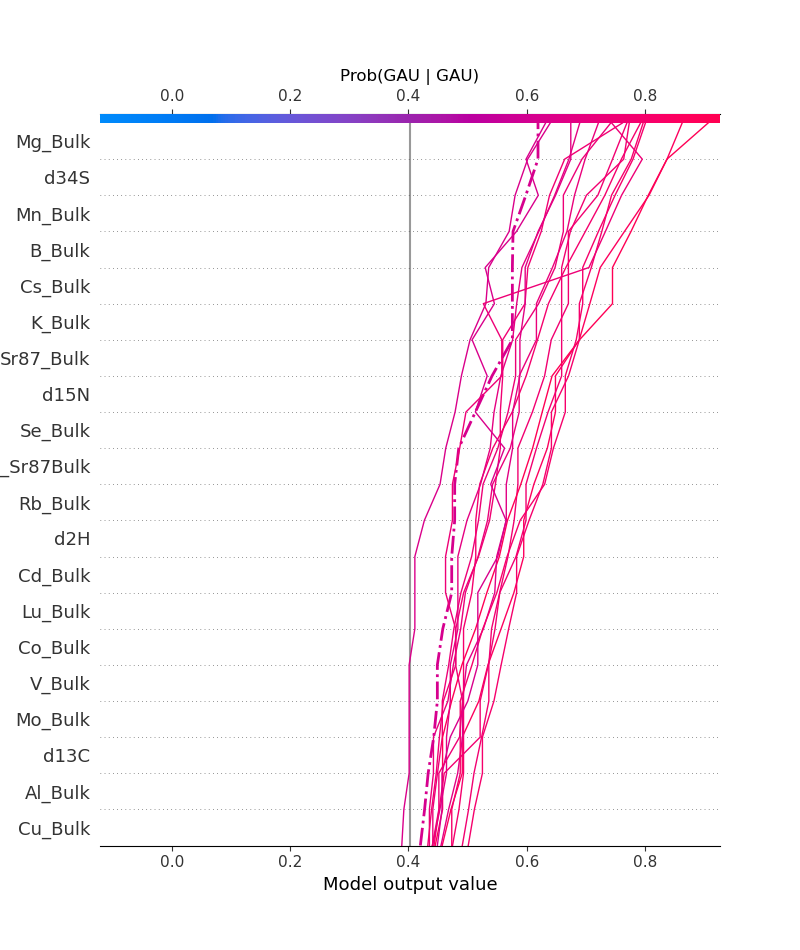

In [206]:
# Of all the GAU predictions, the one with the lowest GAU probability is the one we predicted incorrectly.
# Moreover, it was STILL predicted to be GAU, just also another class.  This is just due to "overlap"
# of the decision boundaries, and doesn't seem to suggest (to me) that anything is particularly bad.
plt.figure()
plt.title('Prob(GAU | GAU)')
shap.decision_plot(
    explainer.expected_value[chosen_class], 
    shap_values_train[chosen_class][mask], 
    feature_names=analytes,
    highlight=incorrect,
)

In [184]:
shap.force_plot(
    base_value=explainer.expected_value[chosen_class],
    shap_values=shap_values_train[chosen_class][mask][incorrect], 
    features=X_train[mask][incorrect],
    feature_names=analytes
)

<IPython.core.display.Javascript object>


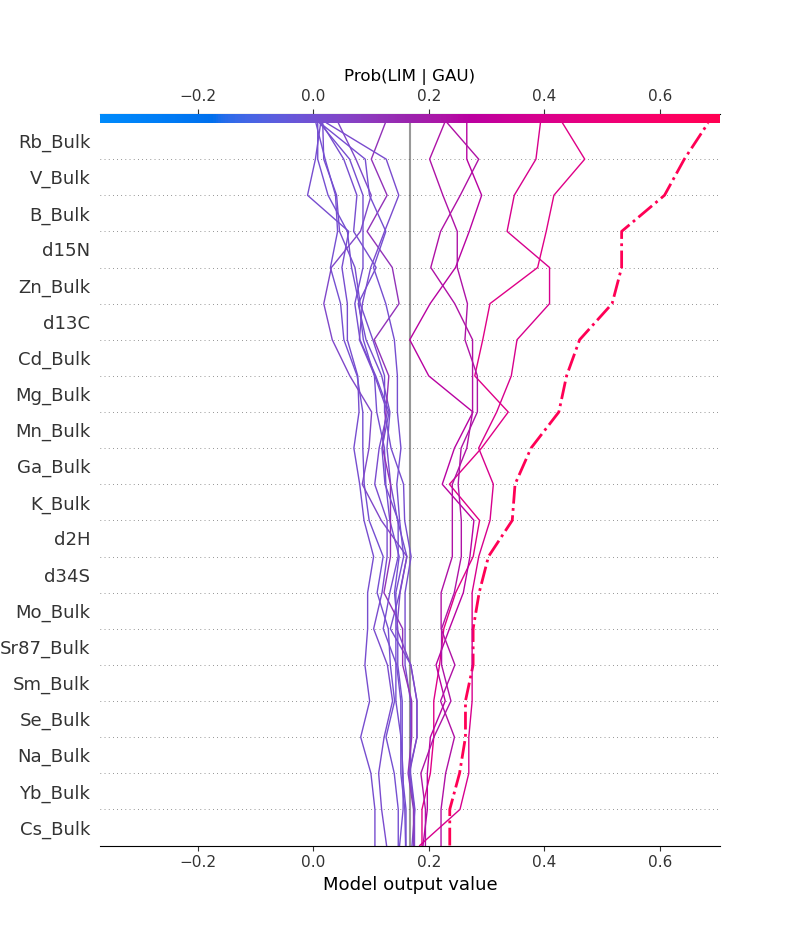

In [207]:
# The LIM prediction probability for this erroneous case was quite high (0.68) but not ~0.9. It is also
# clearly the most extreme example in the training set.  More data could possibly improve this.  

# In general, the fact that there are different "streaks" or "rivers" we see in the decision path suggests
# the model has learned to make decisions in certain distinct ways.  This could warrant further investigation.
plt.figure()
plt.title('Prob(LIM | GAU)')
shap.decision_plot(
    explainer.expected_value[1], 
    shap_values_train[1][mask], 
    feature_names=analytes,
    highlight=incorrect,
)

In [152]:
# LIM is class 1
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values_train[1][mask][incorrect], 
    features=X_train[mask][incorrect],
    feature_names=analytes
)

# Note from the summary plot that high values of B_Bulk (leading contribution below) are associated with
# high LIM probabilities.  Perhaps this sample had an abnormally high B_Bulk value which confused the model.

In [194]:
# Probs directly from SHAP ...
np.sum(shap_values_train[1][mask], axis=1) + explainer.expected_value[1]

array([0.01291743, 0.00780937, 0.01450122, 0.01647196, 0.4317856 ,
       0.00472204, 0.12481041, 0.26595533, 0.68382368, 0.0435375 ,
       0.01123979, 0.23230144, 0.0233495 , 0.22739271, 0.01215011,
       0.39345111])

In [196]:
# are the same as directly from the model
probs = gs.predict_proba(X_train)[mask,1]
probs

array([0.01291743, 0.00780937, 0.01450122, 0.01647196, 0.4317856 ,
       0.00472204, 0.12481041, 0.26595533, 0.68382368, 0.0435375 ,
       0.01123979, 0.23230144, 0.0233495 , 0.22739271, 0.01215011,
       0.39345111])

<IPython.core.display.Javascript object>


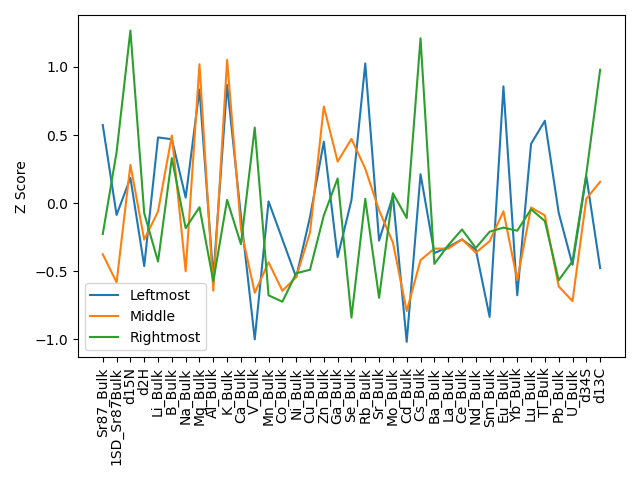

In [227]:
thresholds = [0.2, 0.3, 0.5] # Exclude the single incorrect prediction

# Compute z score for trainin data to look for salient trends
mean_x = np.mean(X_train, axis=0)
std_x = np.std(X_train, axis=0)

leftmost = (X_train[mask][probs < thresholds[0]] - mean_x) / std_x
middle = (X_train[mask][(thresholds[0] <= probs) & (probs < thresholds[1])] - mean_x) / std_x
rightmost = (X_train[mask][probs >= thresholds[1]] - mean_x) / std_x

plt.figure()
plt.errorbar(x = np.arange(1, 1+len(analytes)), 
             y = np.mean(leftmost, axis=0), 
             label='Leftmost')#, yerr = np.std(leftmost, axis=0))
plt.errorbar(x = np.arange(1, 1+len(analytes)), 
             y = np.mean(middle, axis=0),
             label='Middle')#, yerr = np.std(middle, axis=0))
plt.errorbar(x = np.arange(1, 1+len(analytes)), 
             y = np.mean(rightmost, axis=0),
             label='Rightmost'
            )#, yerr = np.std(rightmost, axis=0))
_ = plt.xticks(ticks=np.arange(1, 1+len(analytes)), labels=analytes, rotation=90)
plt.legend(loc='best')
plt.ylabel('Z Score')
plt.tight_layout()

In [ ]:
# Nothing incredibly obvious above, but perhaps there is some correlation in other (meta)data or how it was 
# collected, so you can go back and check into that.

### Look at the GAU errors in the Test Set

In [ ]:
chosen_class = 0 # GAU = class 0

In [228]:
# We have 2 incorrectly predicted examples from the Test set; one was 'unknown' the other was, again,
# a combination between GAU and LIM, although this time GAU was considered the most likely

y_ = y_test
mask = y_ == gs.best_estimator_.named_steps['plsda'].categories[chosen_class]
x_ = X_test
incorrect = ~np.array([a==b for a,b in zip([[a] for a in y_[mask].tolist()], gs.predict(x_[mask]))])

np.array(gs.predict(X_test), dtype=object)[mask][incorrect]

array([list(['UNKNOWN']), list(['GAU', 'LIM'])], dtype=object)

<IPython.core.display.Javascript object>


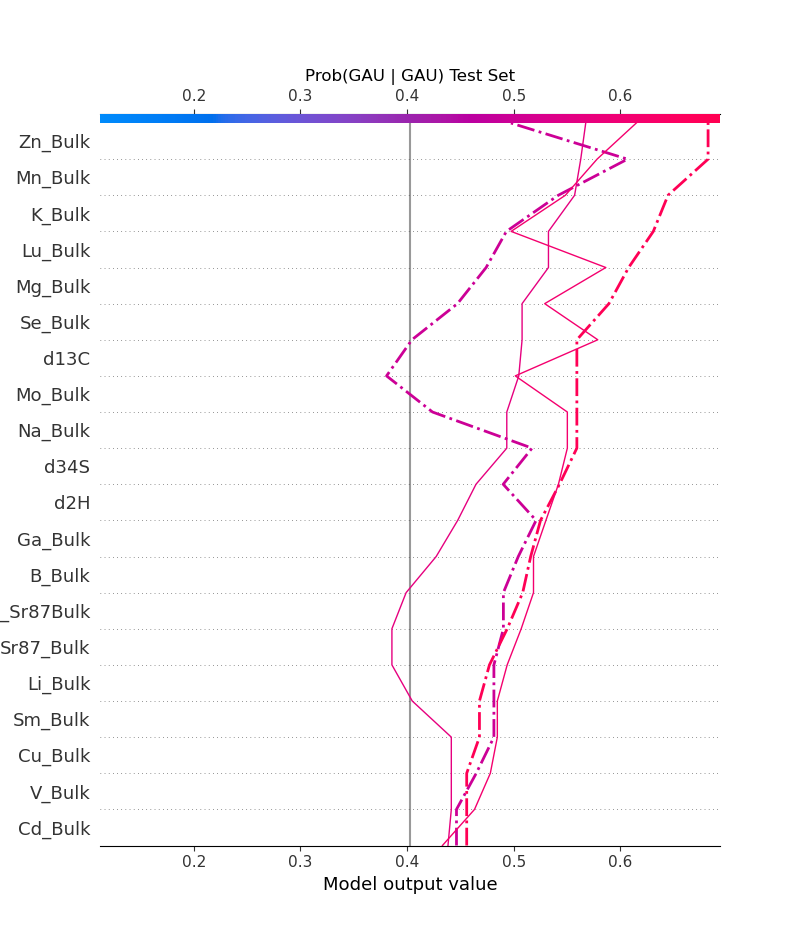

In [229]:
# Of all the GAU predictions, the one with the lowest GAU probability is the one we predicted incorrectly.
# Moreover, it was STILL predicted to be GAU, just also another class.  This is just due to "overlap"
# of the decision boundaries, and doesn't seem to suggest (to me) that anything is particularly bad.
plt.figure()
plt.title('Prob(GAU | GAU) Test Set')
shap.decision_plot(
    explainer.expected_value[chosen_class], 
    shap_values_test[chosen_class][mask], 
    feature_names=analytes,
    highlight=incorrect,
)

# The highest probability is the one predicted to be GAU (and also LIM);
# the other "unknown" is just barely below the threshold for a correct GAU prediction.
# This suggests the model is behaving well, it could just use a little more "fine tuning"

<IPython.core.display.Javascript object>


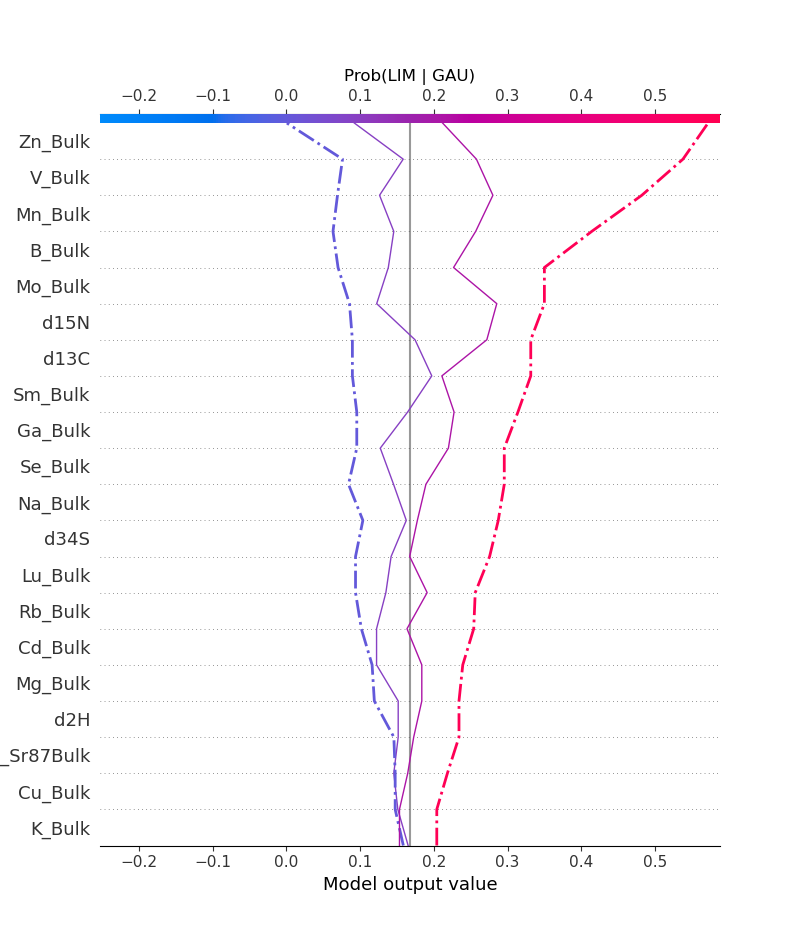

In [230]:
# More good news!  The "unknown" sample has P(LIM) --> 0 so it is not confused by (at least the LIM category)
# this.  Moreover, the P(LIM) for the sample predicted as both LIM and GAU is just barely over the 50% mark;
# so it is predicted to be LIM even though it is GAU, but only just.  Again, this means a little tuning
# could fix this!

# Note: It is clear from the decision path that B_Bulk to Zn_Bulk are contributing to this error most
# significantly.

plt.figure()
plt.title('Prob(LIM | GAU)')
shap.decision_plot(
    explainer.expected_value[1], 
    shap_values_test[1][mask], 
    feature_names=analytes,
    highlight=incorrect,
)

## Diagnostics

In [356]:
# Let's look at a learning curve to see if more data would improve the model further

<IPython.core.display.Javascript object>


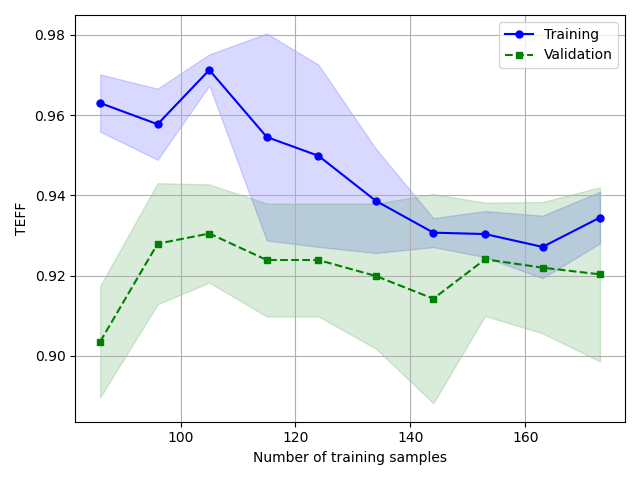

In [357]:
# Let's just take the optimal model we found earlier
model = PLSDA(n_components=3, 
                    alpha=0.05,
                    gamma=0.01,
                    scale_x=True, 
                    not_assigned='UNKNOWN',
                    style='soft', 
                    score_metric='TEFF'
                   )

# Normally we would just use the X_train and y_train, but because data is so scarce we cannot sustain
# a reasonable number of CV splits - here we will resample (sample with replacement) but you could 
# consider more advanced minority class resampling algorithms (e.g., SMOTE). 
from sklearn.utils import resample
X_r, y_r = resample(X, y, n_samples=X.shape[0]*4, stratify=y, random_state=0)

plot_learning_curve(model=model, X=X_r, y=y_r, cv=3, train_sizes=np.linspace(0.5, 1.0, 10))

In [358]:
# Clearly, the two curves are basically parallel and are converged.  This suggests the model will not 
# be greatly improved by more data, but this was performed using resampling.

## Summary

* A PLS-DA model is a discrimination model, even if it is "soft"
* It has a very good performance (total efficiency) at distinguishing between the 4 classes of Beef provided
* Errors seem to be due to "edge" effects which can be improved by a little better tuning, but no obvious errors seem present
* A learning curve suggests we don't really need more data to improve this model

# DD-SIMCA Authentication Models

In [392]:
from chemometrics.classifier.simca import SIMCA_Classifier

In [393]:
# The previous example of PLS-DA trains a single model to distinguish between all known classes, and possibly
# the unknown. An authentication model trains on a single class and uses the others (if provided) as 
# background to check the model's efficiency, but is not used during training.

In [432]:
targets = sorted(np.unique(y_train))[:3] # SIC seems to struggle with a lack of data for this model

## Optimize models

In [436]:
# Now let's optimize a SIMCA model based on its total efficiency (TEFF). Data scaling is handled
# internally via the scale_x hyperparameter so we don't need additional step initially, unless
# you want to add this for some reason.

models = {}

for target in targets:
    pipeline = imblearn.pipeline.Pipeline(steps=[
        # Insert other preprocessing steps here...
        # ("smote", ScaledSMOTEENN(random_state=1)), # For example, class balancing
        ("simca", SIMCA_Classifier(n_components=7, 
                                   alpha=0.05, 
                                   scale_x=True, 
                                   style='dd-simca', 
                                   target_class=target, 
                                   use='TEFF')
        )
    ])

    # Hyperparameters of pipeline steps are given in standard notation: step__parameter_name
    param_grid = [{
        # 'smote__k_enn':[1, 2, 3],
        # 'smote__k_smote':[1, 3, 3],
        # 'smote__kind_sel_enn':['all', 'mode'],
        'simca__n_components':np.arange(1, 10),
        'simca__alpha':[0.05, 0.01],
        'simca__style':['dd-simca'],
        'simca__scale_x':[True]
    }]

    gs = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        n_jobs=-1,
        cv=sklearn.model_selection.StratifiedKFold(
            n_splits=2, 
            shuffle=True, 
            random_state=0
        ),
        error_score=0,
        refit=True
    )

    _ = gs.fit(X_train, y_train)
    
    models[target] = gs
    
    print(target, gs.best_params_)

GAU {'simca__alpha': 0.05, 'simca__n_components': 6, 'simca__scale_x': True, 'simca__style': 'dd-simca'}
LIM {'simca__alpha': 0.05, 'simca__n_components': 1, 'simca__scale_x': True, 'simca__style': 'dd-simca'}
NOR {'simca__alpha': 0.01, 'simca__n_components': 1, 'simca__scale_x': True, 'simca__style': 'dd-simca'}


In [437]:
for target in models:
    print('Best SIMCA model for {} has TEFF (train) = {}, TEFF (test) = {}'.format(
        target,
        '%.4f'%models[target].score(X_train, y_train),
        '%.4f'%models[target].score(X_test, y_test))
    )

Best SIMCA model for GAU has TEFF (train) = 1.0000, TEFF (test) = 0.5000
Best SIMCA model for LIM has TEFF (train) = 0.9354, TEFF (test) = 1.0000
Best SIMCA model for NOR has TEFF (train) = 0.9574, TEFF (test) = 1.0000


<IPython.core.display.Javascript object>


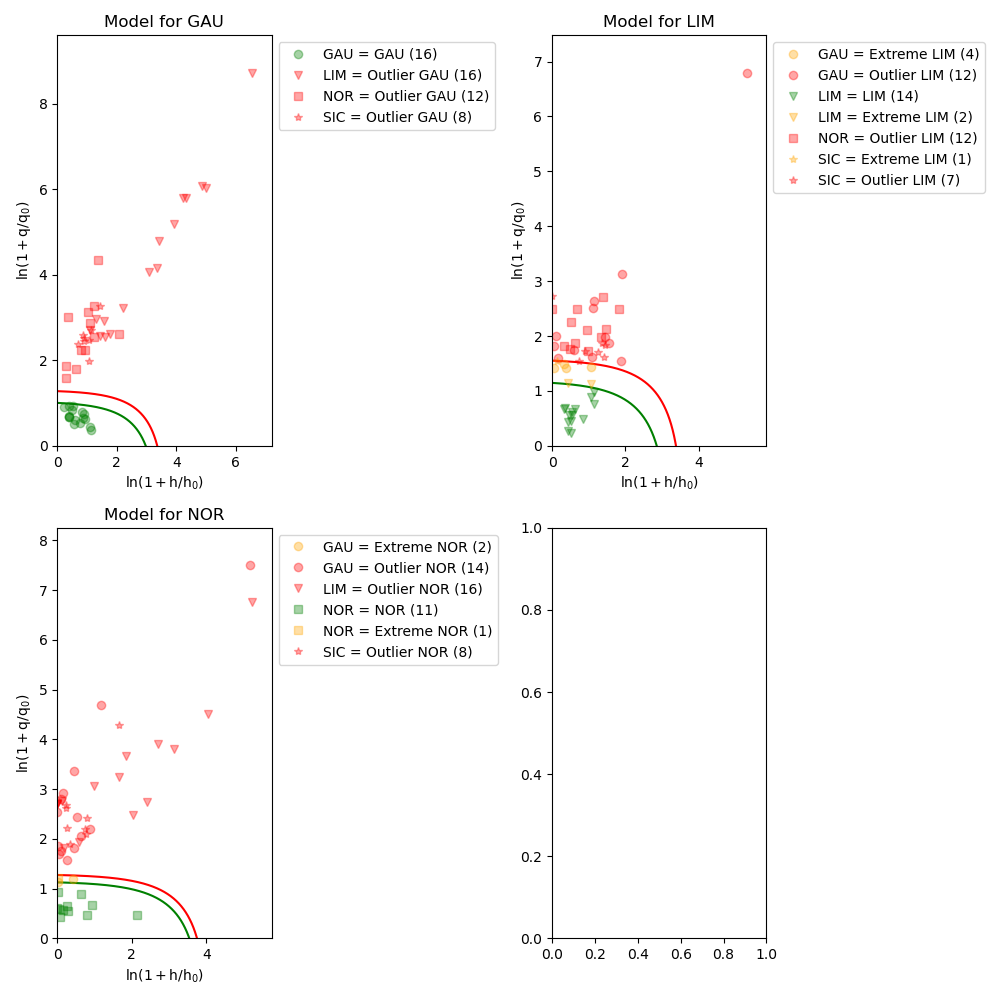

In [439]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for ax, target in zip(axes.flatten(), models.keys()):
    models[target].best_estimator_.named_steps['simca'].model.visualize(X_train, y_train, ax=ax)
    ax.set_title('Model for {}'.format(target))
plt.tight_layout()

In [406]:
# This is pretty good - alternative classes need to fall within the green boundary to be considered part of
# the class the authenticator was trained on; in all training cases, alternatives were classified as
# extremes or outliers. NOR had one true NOR that was considered extreme and LIM had 2, but neither
# characterized those as outliers from the true class.

# Note that GAU's model did not perform very well on the test set (below)

<IPython.core.display.Javascript object>


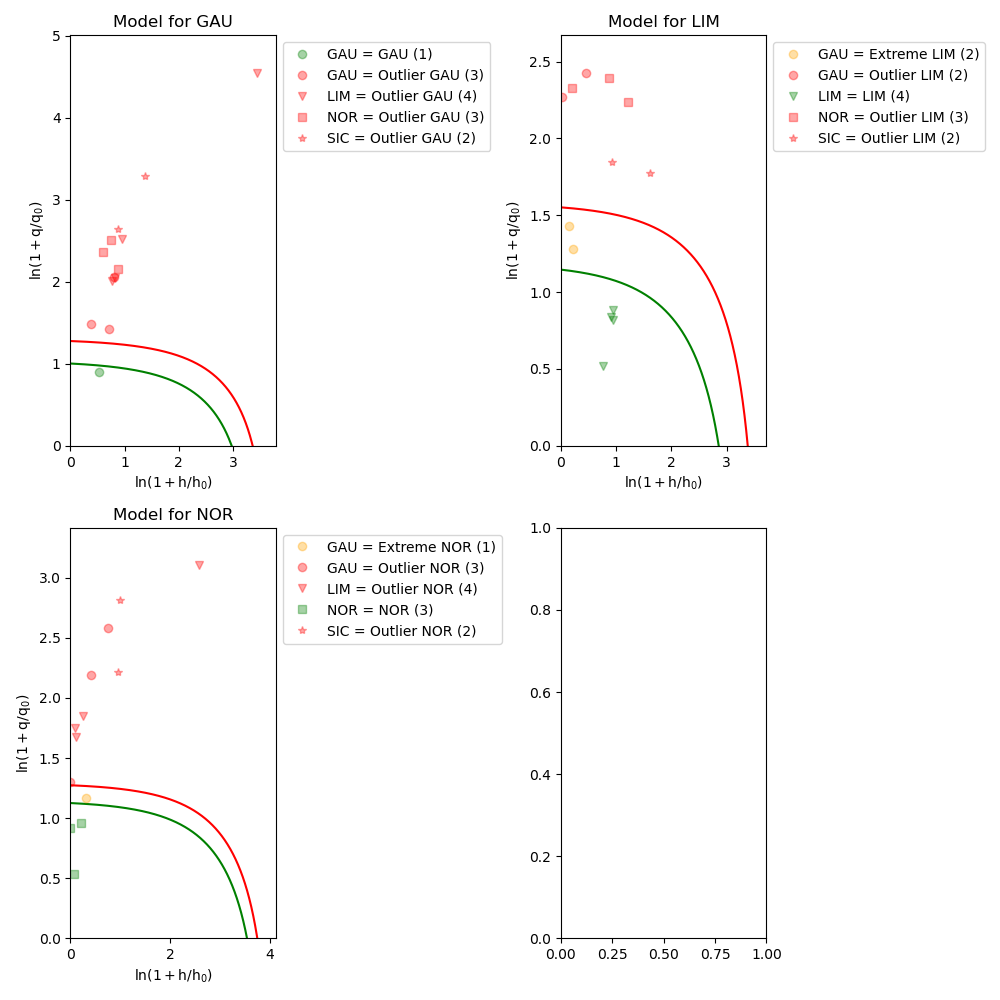

In [468]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for ax, target in zip(axes.flatten(), models.keys()):
    models[target].best_estimator_.named_steps['simca'].model.visualize(X_test, y_test, ax=ax)
    ax.set_title('Model for {}'.format(target))
plt.tight_layout()

## SHAP Explanations

In [440]:
# Let's focus on GAU as an example

In [483]:
shap_values_train = {}
shap_values_test = {}
explainer = {}

for target in targets:
    explain = shap.KernelExplainer(
        model = models[target].predict_proba, 
        data = shap.sample(X_train, 10, random_state=0), # vs. data = X_train to use full training set
    )
    
    explainer[target] = explain
    
    shap_values_train[target] = explain.shap_values(X_train, 
                                    nsamples='auto', # Can increase for lower variance
                                    l1_reg='num_features({})'.format(
                                        np.min(
                                            [X_train.shape[1], 20] # Only look at (up to) the top 20 features
                                        )
                                    )
                                   )[0] # Just save inlier class results
    
    shap_values_test[target] = explain.shap_values(X_test, 
                                    nsamples='auto', # Can increase for lower variance
                                    l1_reg='num_features({})'.format(
                                        np.min(
                                            [X_test.shape[1], 20] # Only look at (up to) the top 20 features
                                        )
                                    )
                                   )[0] # Just save inlier class results

<IPython.core.display.Javascript object>


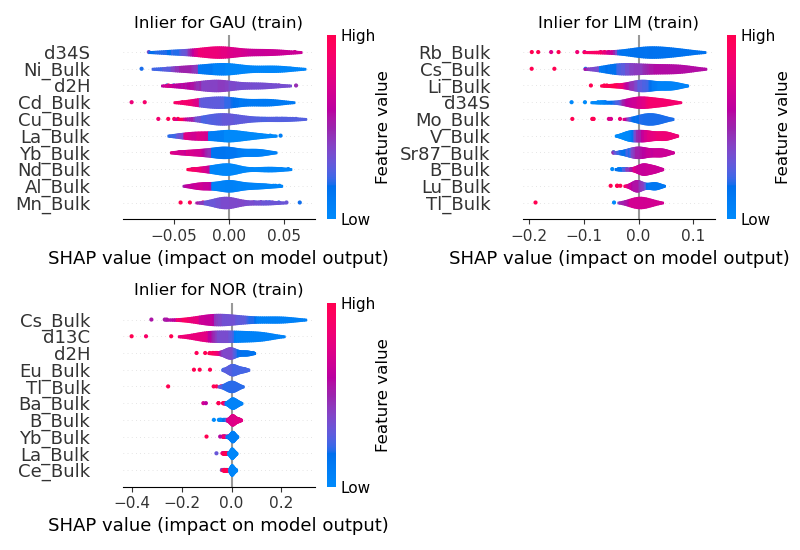

In [484]:
fig = plt.figure(figsize=(10,6))

for i,target in enumerate(targets):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_title('Inlier for {} (train)'.format(target))
    sv = shap_values_train[target]

    shap.summary_plot(
        shap_values=sv,
        features=X_train,
        feature_names=analytes,
        plot_type='violin',
        max_display=10
    )
plt.tight_layout()

In [ ]:
# NOR is almost completely decided on the basis of Cs_Bulk and d13C values (in training).

<IPython.core.display.Javascript object>


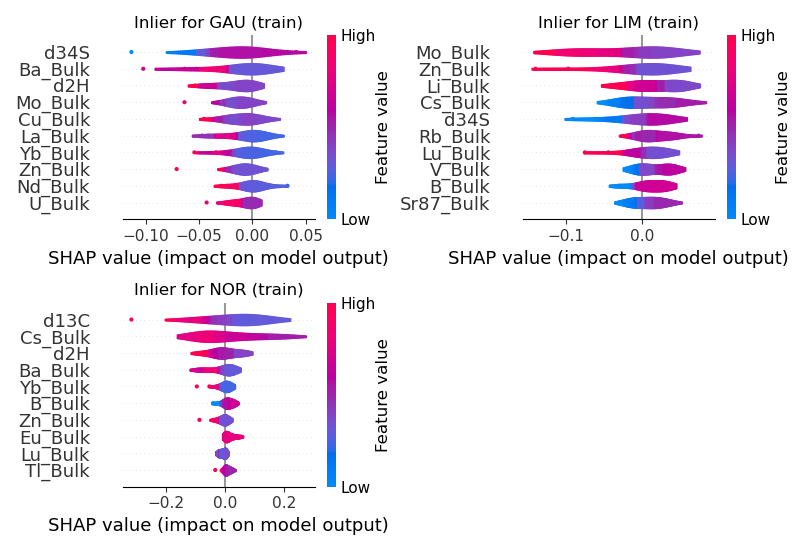

In [485]:
fig = plt.figure(figsize=(10,6))

for i,target in enumerate(targets):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_title('Inlier for {} (train)'.format(target))
    sv = shap_values_test[target]

    shap.summary_plot(
        shap_values=sv,
        features=X_test,
        feature_names=analytes,
        plot_type='violin',
        max_display=10
    )
plt.tight_layout()

In [ ]:
# NOR's decisions based on the same analytes in the test set, too.

### Look at the GAU errors on the Test Set

In [491]:
mask = y_test == 'GAU'
incorrect = models['GAU'].predict(X_test[mask]) == False

<IPython.core.display.Javascript object>


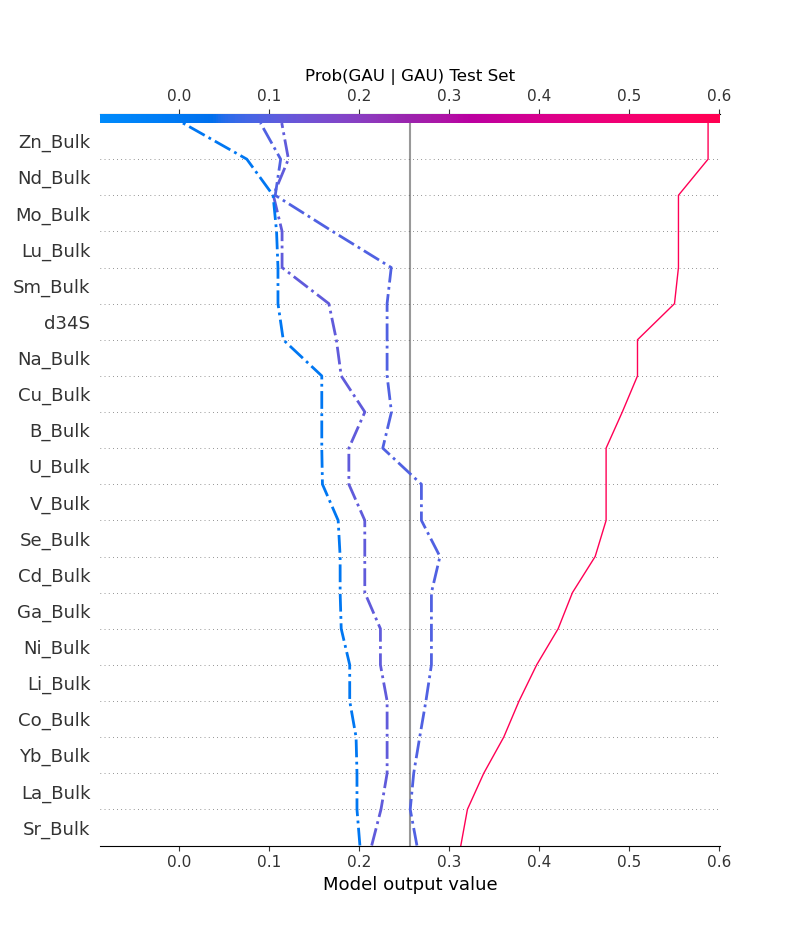

In [492]:
plt.figure()
plt.title('Prob(GAU | GAU) Test Set')
shap.decision_plot(
    explainer['GAU'].expected_value[0], 
    shap_values_test['GAU'][mask], 
    feature_names=analytes,
    highlight=incorrect,
)

In [493]:
# All of the mistakes follow a similar path.  This could be a problem.  Clearly many of the elements have
# little to no effect, and a few really decrease the probability of being assigned to GAU even though that
# is the correct assignment.  This suggests that there is a set of samples that do belong to GAU but which
# haven't been captured by the model. 

# Further investigation would be warranted.  Perhaps these all come from a single souce (farm, field, etc.)
# that has a unique terroir which appears different from other sources in the GAU class.  In that case, 
# there seems to be a sampling issue.

## Diagnostics

In [ ]:
# Normally we would just use the X_train and y_train, but because data is so scarce we cannot sustain
# a reasonable number of CV splits - here we will resample (sample with replacement) but you could 
# consider more advanced minority class resampling algorithms (e.g., SMOTE). 
from sklearn.utils import resample
X_r, y_r = resample(X, y, n_samples=X.shape[0]*4, stratify=y, random_state=0)

<IPython.core.display.Javascript object>


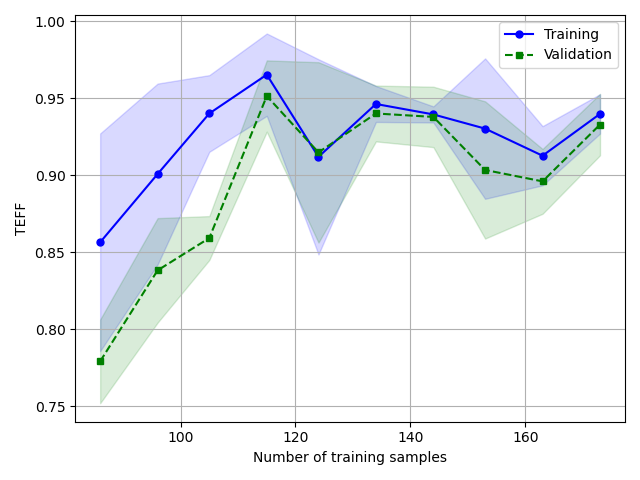

In [495]:
# Let's just take the optimal model we found earlier
model = copy.deepcopy(models['GAU'])

plot_learning_curve(model=model, X=X_r, y=y_r, cv=3, train_sizes=np.linspace(0.5, 1.0, 10))

<IPython.core.display.Javascript object>


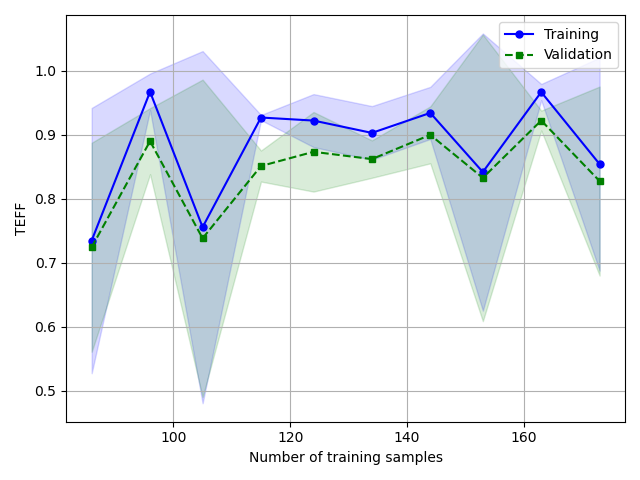

In [496]:
# Let's just take the optimal model we found earlier
model = copy.deepcopy(models['LIM'])

plot_learning_curve(model=model, X=X_r, y=y_r, cv=3, train_sizes=np.linspace(0.5, 1.0, 10))

<IPython.core.display.Javascript object>


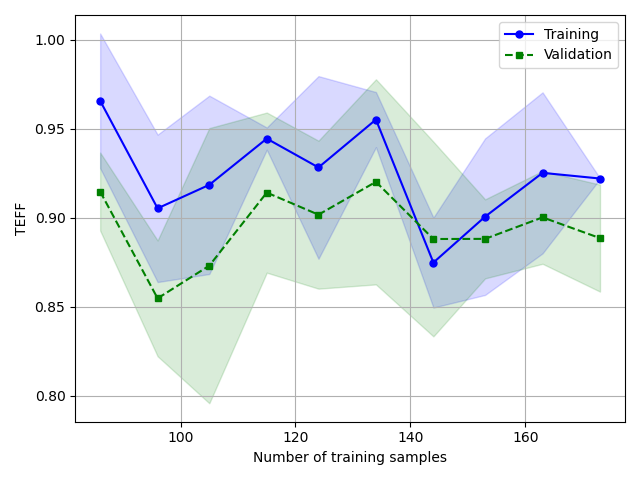

In [498]:
# Let's just take the optimal model we found earlier
model = copy.deepcopy(models['NOR'])

plot_learning_curve(model=model, X=X_r, y=y_r, cv=3, train_sizes=np.linspace(0.5, 1.0, 10))

## Summary

* Many SIMCA models seem to perform well on test/train, but GAU has some issues which weren't found in the discrimination model.  Authentication often needs more data because it has to characterize the class based solely on the "positive" case; discrimination learns "differences" between specific classes which is usually easier and needs less data.
* LC suggests the GAU model doesn't need more data to IMPROVE upon WHAT IT ALREADY KNOWS ABOUT, but SHAP suggests that there is room to learn NEW things that could improve the TEFF even more.

# EllipticManifold Authentication Models

In [ ]:
from chemometrics.manifold.elliptic import EllipticManifold

## Optimize model

## SHAP Explanations

## Diagnostics

## Summary